## Plot the results from the other software

In [1]:
# running in 'capture' to suppress install message
from IPython.utils import io

with io.capture_output() as captured:
	# importing ipython to run magic functions from script
	from IPython import get_ipython
	ipython = get_ipython()
	ipython.magic("matplotlib inline");
#display(HTML(style));

import numpy as np
import matplotlib.pyplot as plt

In [18]:
# first simulation with an amplitude of 1.2micron and 1 seconds of samling at 1/80
a = [0.0, 2.287394894, 4.560687238, 6.805861428, 9.00907522, 11.15674507,
    13.23562987, 15.23291261, 17.13627939, 18.9339953, 20.61497683, 22.16886018,
    23.58606513, 24.85785415, 25.97638623, 26.93476525, 27.72708249, 28.34845304,
    28.79504596, 29.06410784, 29.15397983, 29.06410784, 28.79504596, 28.34845304,
    27.72708249, 26.93476525, 25.97638623, 24.85785415, 23.58606513, 22.16886018,
    20.61497683, 18.9339953, 17.13627939, 15.23291261, 13.23562987, 11.15674507,
    9.00907522, 6.805861428, 4.560687238, 2.287394894, 3.570214893e-15,
    -2.287394894, -4.560687238, -6.805861428, -9.00907522, -11.15674507,
    -13.23562987, -15.23291261, -17.13627939, -18.9339953, -20.61497683,
    -22.16886018, -23.58606513, -24.85785415, -25.97638623, -26.93476525,
    -27.72708249, -28.34845304, -28.79504596, -29.06410784, -29.15397983,
    -29.06410784, -28.79504596, -28.34845304, -27.72708249, -26.93476525,
    -25.97638623, -24.85785415, -23.58606513, -22.16886018, -20.61497683,
    -18.9339953, -17.13627939, -15.23291261, -13.23562987, -11.15674507,
    -9.00907522, -6.805861428, -4.560687238, -2.287394894, -7.140429787e-15]
# second simulation with an amplitude of 1micron and 2 seconds of samling at 1/80
a = [0.0, 1.97189215, 3.931626929, 5.867121921, 7.766444155, 9.617883678,
  11.41002575, 13.13182122, 14.77265464, 16.32240974, 17.77153175, 19.11108636,
  20.33281477, 21.42918461, 22.39343641, 23.21962522, 23.90265732, 24.43832159,
  24.82331548, 25.05526538, 25.13274123, 25.05526538, 24.82331548, 24.43832159,
  23.90265732, 23.21962522, 22.39343641, 21.42918461, 20.33281477, 19.11108636,
  17.77153175, 16.32240974, 14.77265464, 13.13182122, 11.41002575, 9.617883678,
  7.766444155, 5.867121921, 3.931626929, 1.97189215, 3.07777146e-15, -1.97189215,
  -3.931626929, -5.867121921, -7.766444155, -9.617883678, -11.41002575,
  -13.13182122, -14.77265464, -16.32240974, -17.77153175, -19.11108636,
  -20.33281477, -21.42918461, -22.39343641, -23.21962522, -23.90265732,
  -24.43832159, -24.82331548, -25.05526538, -25.13274123, -25.05526538,
  -24.82331548, -24.43832159, -23.90265732, -23.21962522, -22.39343641,
  -21.42918461, -20.33281477, -19.11108636, -17.77153175, -16.32240974,
  -14.77265464, -13.13182122, -11.41002575, -9.617883678, -7.766444155,
  -5.867121921, -3.931626929, -1.97189215
-6.15554292e-15, 1.97189215, 3.931626929, 5.867121921, 7.766444155,
  9.617883678, 11.41002575, 13.13182122, 14.77265464, 16.32240974, 17.77153175,
  19.11108636, 20.33281477, 21.42918461, 22.39343641, 23.21962522, 23.90265732,
  24.43832159, 24.82331548, 25.05526538, 25.13274123, 25.05526538, 24.82331548,
  24.43832159, 23.90265732, 23.21962522, 22.39343641, 21.42918461, 20.33281477,
  19.11108636, 17.77153175, 16.32240974, 14.77265464, 13.13182122, 11.41002575,
  9.617883678, 7.766444155, 5.867121921, 3.931626929, 1.97189215,
  9.233314379e-15, -1.97189215, -3.931626929, -5.867121921, -7.766444155,
  -9.617883678, -11.41002575, -13.13182122, -14.77265464, -16.32240974,
  -17.77153175, -19.11108636, -20.33281477, -21.42918461, -22.39343641,
  -23.21962522, -23.90265732, -24.43832159, -24.82331548, -25.05526538,
  -25.13274123, -25.05526538, -24.82331548, -24.43832159, -23.90265732,
  -23.21962522, -22.39343641, -21.42918461, -20.33281477, -19.11108636,
  -17.77153175, -16.32240974, -14.77265464, -13.13182122, -11.41002575,
  -9.617883678, -7.766444155, -5.867121921, -3.931626929, -1.97189215,
  -1.231108584e-14]

# third simulation with an amplitude of 0.45micron and 2 seconds of samling at 1/80
a1 = [0.0, 0.8873514675, 1.769232118, 2.640204864, 3.49489987, 4.328047655,
  5.134511588, 5.909319549, 6.64769459, 7.345084383, 7.997189289, 8.599988863,
  9.149766646, 9.643133075, 10.07704638, 10.44883135, 10.75619579, 10.99724471,
  11.17049197, 11.27486942, 11.30973355, 11.27486942, 11.17049197, 10.99724471,
  10.75619579, 10.44883135, 10.07704638, 9.643133075, 9.149766646, 8.599988863,
  7.997189289, 7.345084383, 6.64769459, 5.909319549, 5.134511588, 4.328047655,
  3.49489987, 2.640204864, 1.769232118, 0.8873514675, 1.384997157e-15,
  -0.8873514675, -1.769232118, -2.640204864, -3.49489987, -4.328047655,
  -5.134511588, -5.909319549, -6.64769459, -7.345084383, -7.997189289,
  -8.599988863, -9.149766646, -9.643133075, -10.07704638, -10.44883135,
  -10.75619579, -10.99724471, -11.17049197, -11.27486942, -11.30973355,
  -11.27486942, -11.17049197, -10.99724471, -10.75619579, -10.44883135,
  -10.07704638, -9.643133075, -9.149766646, -8.599988863, -7.997189289,
  -7.345084383, -6.64769459, -5.909319549, -5.134511588, -4.328047655,
  -3.49489987, -2.640204864, -1.769232118, -0.8873514675,
  -2.769994314e-15, 0.8873514675, 1.769232118, 2.640204864, 3.49489987,
  4.328047655, 5.134511588, 5.909319549, 6.64769459, 7.345084383, 7.997189289,
  8.599988863, 9.149766646, 9.643133075, 10.07704638, 10.44883135, 10.75619579,
  10.99724471, 11.17049197, 11.27486942, 11.30973355, 11.27486942, 11.17049197,
  10.99724471, 10.75619579, 10.44883135, 10.07704638, 9.643133075, 9.149766646,
  8.599988863, 7.997189289, 7.345084383, 6.64769459, 5.909319549, 5.134511588,
  4.328047655, 3.49489987, 2.640204864, 1.769232118, 0.8873514675,
  4.154991471e-15, -0.8873514675, -1.769232118, -2.640204864, -3.49489987,
  -4.328047655, -5.134511588, -5.909319549, -6.64769459, -7.345084383,
  -7.997189289, -8.599988863, -9.149766646, -9.643133075, -10.07704638,
  -10.44883135, -10.75619579, -10.99724471, -11.17049197, -11.27486942,
  -11.30973355, -11.27486942, -11.17049197, -10.99724471, -10.75619579,
  -10.44883135, -10.07704638, -9.643133075, -9.149766646, -8.599988863,
  -7.997189289, -7.345084383, -6.64769459, -5.909319549, -5.134511588,
  -4.328047655, -3.49489987, -2.640204864, -1.769232118, -0.8873514675,
  -5.539988628e-15]
  
'''
# Case 1: phase stored in simple way 
[0.0, 2.287394894, 4.560687238, 6.805861428, 9.00907522, 11.15674507,
    13.23562987, 15.23291261, 17.13627939, 18.9339953, 20.61497683, 22.16886018,
    23.58606513, 24.85785415, 25.97638623, 26.93476525, 27.72708249, 28.34845304,
    28.79504596, 29.06410784, 29.15397983, 29.06410784, 28.79504596, 28.34845304,
    27.72708249, 26.93476525, 25.97638623, 24.85785415, 23.58606513, 22.16886018,
    20.61497683, 18.9339953, 17.13627939, 15.23291261, 13.23562987, 11.15674507,
    9.00907522, 6.805861428, 4.560687238, 2.287394894, 3.570214893e-15,
    -2.287394894, -4.560687238, -6.805861428, -9.00907522, -11.15674507,
    -13.23562987, -15.23291261, -17.13627939, -18.9339953, -20.61497683,
    -22.16886018, -23.58606513, -24.85785415, -25.97638623, -26.93476525,
    -27.72708249, -28.34845304, -28.79504596, -29.06410784, -29.15397983,
    -29.06410784, -28.79504596, -28.34845304, -27.72708249, -26.93476525,
    -25.97638623, -24.85785415, -23.58606513, -22.16886018, -20.61497683,
    -18.9339953, -17.13627939, -15.23291261, -13.23562987, -11.15674507,
    -9.00907522, -6.805861428, -4.560687238, -2.287394894, -7.140429787e-15]
'''
b = [(i-np.pi)%(2*np.pi)-np.pi for i in a]
b1 = [(i-np.pi)%(2*np.pi)-np.pi for i in a1]

#c = [i/(2*np.pi) for i in a]

(721, 721)

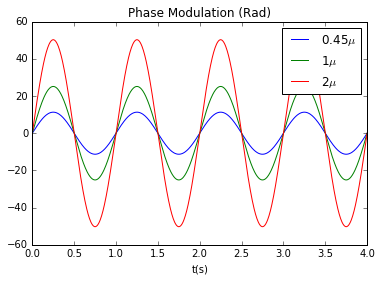

In [182]:
# Read the file from a text
a = np.loadtxt("Vibration_045mu.txt")
a1 = np.loadtxt("Vibration_1mu.txt")
a2 = np.loadtxt("Vibration_2mu.txt")
t = np.arange(0,4+1/180,1/180)

plt.plot(t,a, label="0.45$\mu$")
plt.plot(t,a1, label="1$\mu$")
plt.plot(t,a2, label="2$\mu$")
plt.legend()
plt.xlabel('t(s)')
plt.title('Phase Modulation (Rad)')
#plt.show()
plt.savefig('PhaseModulation.png')

len(t) , len(a)

In [25]:
max(a)/np.pi , max(a1)/np.pi

(3.6000000000000143, 3.599999999069499)

In [26]:
  #2.8
  
-5.2/4 
  
def mod(a,b):
        q = int(a/b)  
        
        return a-b*q
def modpy(a,b):
        q = (int(a/b))  
        r= (a)-(b)*(q)
        if r > 0:
            return r
        else:
            return abs(b)+r

x = 5.2
y = -4
xx = modpy(x,y)
print(xx)
-5.2%4
nn = np.zeros(2)
nn[1] = 1
nn

1.2000000000000002


array([ 0.,  1.])

# methods to check the upconversion phenomena in phase modulation
Since the main point that may help to find the upconversion phenomenas is the phase change of the photons when they hit a vibrating wall, it means that phase change, in case there is upconversion, will be higher than $\pi$, but the phase is cyclic between $\pi$ and $-\pi$. From the fact that we can constrain the phase between those values, it would be theoretically possible to find a way in which this phase changes beyond a single wavelength, it's rescaled into a *single wavelength change* creating the upconversion phenomena.

Up to now, I have thought some methods that I want to check. Partly are explained on the **Wall vibrating** document
-  b = [(i-np.pi)%(2*np.pi)-np.pi for i in a]
- 



All that makes me question some things?
- Should I call the higher frequencies as harmonics?
- Shall I create many waves with many limits/frequencies in an array: $a = \pi \cdot[1..int(a/\pi)] $

first
first
first


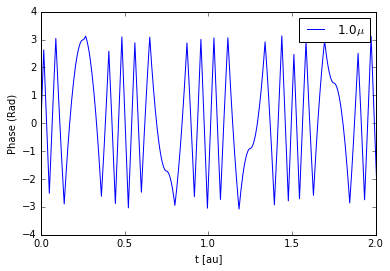

False

In [190]:
'''
def modSpecial( a, old ):
    "do the mod of the finction with sense"
    n = int(a/np.pi)
    pi = np.pi
    if a > n*pi :
        if n%2==0:
                return n*pi - a 
        if n%2==1:
                return a-n*pi  
  
    elif a < -n*pi : 
         if n%2==0:                
                return -n*pi - a
         if n%2==1:
                return a+n*pi 
    else: return a 
'''
def iterlist(a):
    na = np.zeros(len(a))
    creciente = True
    for i in range(0,len(a)-1): # [0,1,..,range(a)]
        if i == 0: 
            print('first')
            na[0] = a[0]
        else:
            delta = abs(a[i]-a[i-1])
            if creciente:
                # we are on creciente             
                #print(delta)
                if ((na[i-1]+delta) < np.pi):  
                    #print(i, delta,na[i-1], creciente,'crece', np.pi)
                    na[i] = na[i-1]+delta
                else:
                    #print(i, delta,na[i-1], creciente,'decrece')
                    na[i] = na[i-1]-delta
                    creciente = False
                    
            else:
                # we are on creciente
                #delta = a[i]-a[i-1]
                #print(delta,'out')
                if (na[i-1]-delta) > -np.pi:  
                    na[i] = na[i-1]-delta
                else:
                    #print('bad place?')
                    na[i] = na[i-1]+delta
                    creciente = True
    return na
#a=[i/2 for i in a]
#a = a2 # other list  
#c = [modSpecial(a[i]) for i in np.arange(a)]
c = iterlist(a)
c1 = iterlist(a1)
c2 = iterlist(a2)


#plt.plot(a,label="a")
#plt.plot(a1,label="a1")

#plt.plot(b,label="b")
#plt.plot(b1,label="b1")
#plt.plot(t,c,label="0.45$\mu$")
plt.plot(t,c1,label="1.0$\mu$")
#plt.plot(t,c2,label="2.0$\mu$")

plt.legend()
plt.ylabel('Phase (Rad)')
plt.xlabel('t [au]')
plt.xlim(0,2)
plt.savefig('PhaseModulation_scaled2.png')

plt.show()
3.3 < np.pi

In [87]:
# Fourier transform
ta = np.fft.fft(a)  
tb = np.fft.fft(b)
tc = np.fft.fft(c)
tc1 = np.fft.fft(c1)
ta1 = np.fft.fft(a1)  
tb1 = np.fft.fft(b1)
tc2 = np.fft.fft(c2)


In [88]:

len(ta)
mta = np.sqrt(ta.real*ta.real+ta.imag*ta.imag)
mtb = np.sqrt(tb.real*tb.real+tb.imag*tb.imag)
mtc = np.sqrt(tc.real*tc.real+tc.imag*tc.imag)

mta1 = np.sqrt(ta1.real*ta1.real+ta1.imag*ta1.imag)
mtb1 = np.sqrt(tb1.real*tb1.real+tb1.imag*tb1.imag)
mtc1 = np.sqrt(tc1.real*tc1.real+tc1.imag*tc1.imag)
#tb
mtc2 = np.sqrt(tc2.real*tc2.real+tc2.imag*tc2.imag)

len(mtc)/2


360.5

About the frequency axis, it's done in the way that $f_max$ is $1/\Delta t $ and the $f_min$ is done with the max sampling done on the time: $f_min = 0.5/T$

It must be taken into account the cyclic result of the fft, so the result will be starting from 0Hz and will go to the negative frequencies after arrivin to the mid value

In [145]:
xta = np.arange(-40,41,1/4)
xta1 = np.arange(-90.25,90,1/4)


len(xta1[361:]), len(mtc2[0:360])
#len(xta[40:80])
#len(np.arange(0.,1.5,(1./80.)))


(360, 360)

## Visualization of the upconversion phenomena

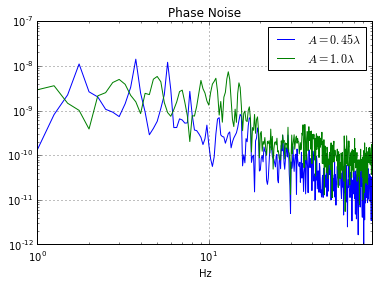

In [165]:
ma = 80
#plt.plot(xta2[0:ma],mta[0:ma],label="c")
#plt.plot(xta[80:ma+80],mtc[0:ma],label="$A=\lambda$") #[80:ma+80 [0:ma]
#plt.plot(xta[80:ma+80],mtc1[0:ma],label="$A=\lambda/2$")
x = np.arange(-90.25,90,1/4)
#
mult = 1e-6/3e3/4/np.pi
plt.loglog(x[361:],mult*mtc[0:360],label="$A=0.45\lambda$") # aprox 7
plt.loglog(x[361:],mult*mtc1[0:360],label="$A=1.0\lambda$") #aprox 15
#plt.loglog(x[361:],mult*mtc2[0:360],label="$A=2.0\lambda$") #[80:ma+80 [0:ma]

plt.legend()
plt.xlabel('Hz')
plt.xlim(1,90)
plt.ylim(ymin=1e-12)#,1e-7)
plt.title('Phase Noise')
plt.yticks()
plt.grid()
plt.savefig('upconversion.png')





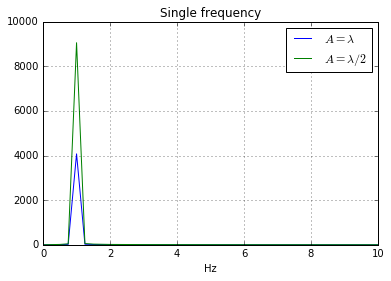

In [194]:
plt.plot(x[361:],mta[0:360],label="$A=\lambda$") #[80:ma+80 [0:ma]
plt.plot(x[361:],mta1[0:360],label="$A=\lambda/2$")

plt.legend()
plt.xlabel('Hz')
plt.xlim(0,10)
#plt.ylim(-10)
plt.title('Single frequency')
plt.yticks()
plt.grid()
plt.savefig('SingleFreq.png')

plt.show()

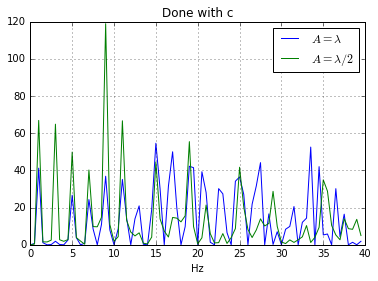

In [13]:
plt.plot(xta[80:ma+80],mtb[0:ma],label="$A=\lambda$") #[80:ma+80 [0:ma]
plt.plot(xta[80:ma+80],mtb1[0:ma],label="$A=\lambda/2$")

plt.legend()
plt.xlabel('Hz')
plt.xlim(0,40)
#plt.ylim(-10)
plt.title('Done with b (bad)')
plt.yticks()
plt.grid()
plt.show()

In [61]:
12.4/np.pi

3.947042588679005